In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np

In [10]:


input_files = os.listdir("/home/soeren/Documents/TextDifficultyAssessmentGerman/datasets/RandomText/FeatureSet3_LV")
input_files = [input_file for input_file in input_files if input_file.startswith("10_RandomText") and "train" in input_file]

for input_file in input_files:
    df = pd.read_csv("datasets/RandomText/FeatureSet3_LV" + input_file, sep="|", lineterminator = '\n')
    df_count= df['newLevel'].value_counts()
    print(df_count)
    
    plt.bar(df_count.index.values, df_count, align='center', alpha=0.5)
    plt.title("Distribution of Text with the Different Complexity Levels - " + input_file)
    plt.show()

FileNotFoundError: File b'datasets/RandomText/FeatureSet3_LV10_RandomText_train_3_df.csv' does not exist

In [3]:
text_df = pd.read_csv("datasets/RandomText/FeatureSet2_LD/01_Preprocessing_df.csv", sep="|", lineterminator = '\n')
text_df = text_df.drop(errors="ignore", columns=["LD-yule_s_k", "LD-hdd", "SC-av_non_terminals_per_word", "SC-av_clause_length", 'SE_ratioRealSpellingErrors', 'SE_ratioSpellingErrors', 'SE_ratioSpellingErrorsWithCorrection', 'SE_ratioSpellingErrorsWithoutCorrection', 'SE_ratioUmlautSpellingErrors', 'SE_ratioCapitalisationErrors'])


text_normalizedDF = text_df
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(text_normalizedDF._get_numeric_data()) 
text_normalizedDF[text_normalizedDF._get_numeric_data().columns] = scaled_values

trainDF, testDF = train_test_split(text_normalizedDF, test_size=0.33)

features = text_normalizedDF._get_numeric_data().columns

X_train = trainDF[features]
y_train = trainDF["newLevel"]

X_test = testDF[features]
y_test = testDF["newLevel"]

clf = LinearSVC().fit(X_train, y_train)
score = clf.score(X_test, y_test)

print("=== Score on Text Dataset: " + str(score))

for input_file in input_files:
    df = pd.read_csv("datasets/RandomText/FeatureSet2_LD/" + input_file, sep="|", lineterminator = '\n')
    df = df.drop(errors="ignore", columns=["LD-yule_s_k", "LD-hdd", "SC-av_non_terminals_per_word", "SC-av_clause_length"])

    scaled_values = scaler.transform(df._get_numeric_data())
    df[df._get_numeric_data().columns] = scaled_values
    
    X = df[features]
    y = df["newLevel"]
    score = clf.score(X, y)
    print("=== Score on " + input_file + ": " + str(score))

=== Score on Text Dataset: 0.66548463356974


NameError: name 'input_files' is not defined

=== Score on 1: 0.5485232067510548
=== Score on 2: 0.6368062317429406
=== Score on 3: 0.695906432748538
=== Score on 4: 0.7277452891487979
=== Score on 5: 0.7422764227642277
=== Score on 6: 0.7787524366471735
=== Score on 7: 0.770193401592719
=== Score on 8: 0.8151041666666666
=== Score on 9: 0.8157894736842105


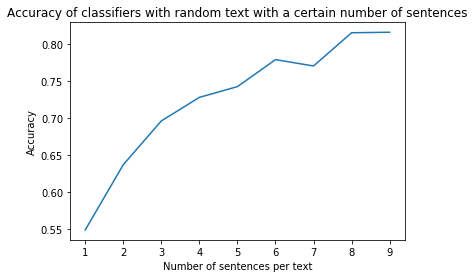

In [9]:
numbers = range(1,10)
scores = []

for number in numbers:
    trainDF = pd.read_csv("datasets/RandomText/FeatureSet2_LD/10_RandomText_train_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    trainDF = trainDF.drop(errors="ignore", columns=["LD-yule_s_k", "LD-hdd", "SC-av_non_terminals_per_word", "SC-av_clause_length"])
    
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(trainDF._get_numeric_data()) 
    trainDF[trainDF._get_numeric_data().columns] = scaled_values
    
    X_train = trainDF[features]
    y_train = trainDF["newLevel"]
    
    testDF = pd.read_csv("datasets/RandomText/FeatureSet2_LD/10_RandomText_test_"+str(number)+"_df.csv", sep="|", lineterminator = '\n')
    testDF = testDF.drop(errors="ignore", columns=["LD-yule_s_k", "LD-hdd", "SC-av_non_terminals_per_word", "SC-av_clause_length"])
    
    scaled_values = scaler.transform(testDF._get_numeric_data()) 
    testDF[testDF._get_numeric_data().columns] = scaled_values
    
    X_test = testDF[features]
    y_test = testDF["newLevel"]
    
    clf = LinearSVC().fit(X_train, y_train)
    
    score = clf.score(X_test, y_test)
    scores.append(score)
    
plt.plot(numbers, scores)
plt.xlabel("Number of sentences per text")
plt.ylabel("Accuracy")
plt.title("Accuracy of classifiers with random text with a certain number of sentences")
plt.show()

    